# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [4]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [5]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

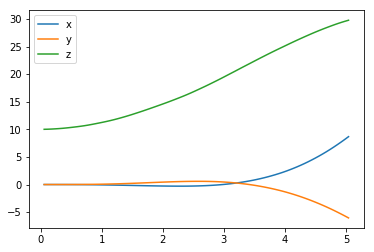

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

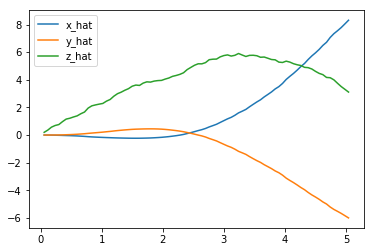

In [7]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

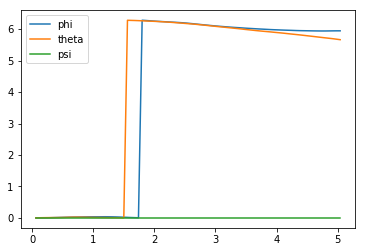

In [8]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

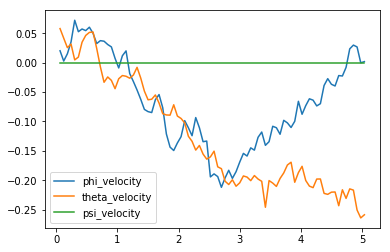

In [9]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

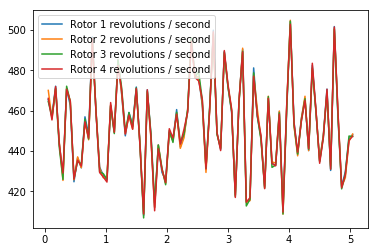

In [10]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [11]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  8.67263204  -6.04975817  29.76670655   5.94668916   5.66525489   0.        ]
[ 8.30948674 -5.99896375  3.11038247]
[ 0.00163335 -0.25879774  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [12]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   2.282 (best =   2.283), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [13]:
%reload_ext autoreload
%autoreload 2

## TODO: Train your agent here.
# takeoff reward function penalty 0.1 vs 0.001 previously
import sys
import pandas as pd
from agents.agent import Agent
import task

num_episodes = 1000
best_score = -100
# worst_score = 100
# define initial and target positions for takeoff; initialized at None in Task class
# init_pos = np.array([0., 0., 10., 0., 0., 0.])
target_pos = np.array([0., 0., 100.])
task = Task(target_pos=target_pos)
agent = Agent(task) 

rewards = []
stats = {}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        best_score = max(best_score, score)
#         worst_score = min(worst_score, score)
             
        if done:
            print("\r{:4d}. score: {:8.3f} best: {:8.3f} pos: ({:8.2f},{:8.2f},{:8.2f})".format(
                i_episode, 
                score, 
                best_score, 
#                 worst_score,
                task.sim.pose[0],
                task.sim.pose[1],
                task.sim.pose[2]))  # [debug]

            break

    rewards.append(score)
    stats[i_episode] = {'Episode': i_episode, 'Reward':score,'Action':action,
                        'Position':(task.sim.pose[0],task.sim.pose[1],task.sim.pose[2])}
    sys.stdout.flush()

Using TensorFlow backend.


   1. score:  122.162 best:  122.162 pos: (   -6.09,  -19.46,    0.00)
   2. score:  126.605 best:  126.605 pos: (  -11.18,  -11.94,    0.00)
   3. score:   64.448 best:  126.605 pos: (   -4.96,   -2.91,    0.00)
   4. score:   62.216 best:  126.605 pos: (   -3.30,   -5.90,    0.00)
   5. score:  104.318 best:  126.605 pos: (   -4.21,  -14.16,    0.00)
   6. score:   75.453 best:  126.605 pos: (   -7.15,   13.51,    0.00)
   7. score:   84.455 best:  126.605 pos: (   11.49,    3.84,    0.00)
   8. score:   84.377 best:  126.605 pos: (    6.52,  -14.74,    0.00)
   9. score:   53.339 best:  126.605 pos: (   -3.13,    0.15,    0.00)
  10. score:   53.355 best:  126.605 pos: (   -0.81,   -1.42,    0.00)
  11. score:   53.367 best:  126.605 pos: (   -0.16,    0.11,    0.00)
  12. score:   55.589 best:  126.605 pos: (   -0.40,    0.06,    0.00)
  13. score:   55.587 best:  126.605 pos: (    0.56,    0.26,    0.00)
  14. score:   55.584 best:  126.605 pos: (    1.52,    0.08,    0.00)
  15. 

 117. score:   55.590 best:  126.605 pos: (   -0.40,   -0.07,    0.00)
 118. score:   55.590 best:  126.605 pos: (   -0.41,   -0.06,    0.00)
 119. score:   55.589 best:  126.605 pos: (   -0.38,   -0.04,    0.00)
 120. score:   55.589 best:  126.605 pos: (   -0.36,   -0.02,    0.00)
 121. score:   55.588 best:  126.605 pos: (   -0.40,   -0.03,    0.00)
 122. score:   53.369 best:  126.605 pos: (   -0.38,   -0.04,    0.00)
 123. score:   53.369 best:  126.605 pos: (   -0.35,   -0.06,    0.00)
 124. score:   53.369 best:  126.605 pos: (   -0.31,   -0.07,    0.00)
 125. score:   53.369 best:  126.605 pos: (   -0.30,   -0.06,    0.00)
 126. score:   53.369 best:  126.605 pos: (   -0.25,   -0.05,    0.00)
 127. score:   53.369 best:  126.605 pos: (   -0.21,   -0.04,    0.00)
 128. score:   53.370 best:  126.605 pos: (   -0.24,   -0.05,    0.00)
 129. score:   53.369 best:  126.605 pos: (   -0.28,   -0.10,    0.00)
 130. score:   53.369 best:  126.605 pos: (   -0.27,   -0.14,    0.00)
 131. 

 233. score:   55.526 best:  126.605 pos: (  -11.60,   -0.47,    0.00)
 234. score:   55.528 best:  126.605 pos: (  -11.15,   -0.40,    0.00)
 235. score:   55.527 best:  126.605 pos: (  -11.17,   -0.42,    0.00)
 236. score:   55.528 best:  126.605 pos: (  -11.02,   -0.38,    0.00)
 237. score:   55.529 best:  126.605 pos: (  -11.12,   -0.30,    0.00)
 238. score:   55.530 best:  126.605 pos: (  -11.09,   -0.17,    0.00)
 239. score:   55.531 best:  126.605 pos: (  -11.39,   -0.02,    0.00)
 240. score:   55.530 best:  126.605 pos: (  -11.76,    0.07,    0.00)
 241. score:   55.530 best:  126.605 pos: (  -11.89,    0.18,    0.00)
 242. score:   55.531 best:  126.605 pos: (  -11.87,    0.03,    0.00)
 243. score:   55.530 best:  126.605 pos: (  -11.84,   -0.19,    0.00)
 244. score:   55.534 best:  126.605 pos: (  -11.33,   -0.20,    0.00)
 245. score:   55.534 best:  126.605 pos: (  -11.37,   -0.14,    0.00)
 246. score:   55.531 best:  126.605 pos: (  -11.63,   -0.14,    0.00)
 247. 

 349. score:   55.531 best:  126.605 pos: (  -13.72,   -0.03,    0.00)
 350. score:   55.525 best:  126.605 pos: (  -13.97,    0.07,    0.00)
 351. score:   55.529 best:  126.605 pos: (  -13.43,   -0.13,    0.00)
 352. score:   55.536 best:  126.605 pos: (  -13.01,   -0.48,    0.00)
 353. score:   55.537 best:  126.605 pos: (  -13.02,   -0.31,    0.00)
 354. score:   55.535 best:  126.605 pos: (  -12.66,   -0.03,    0.00)
 355. score:   55.533 best:  126.605 pos: (  -12.88,    0.18,    0.00)
 356. score:   55.529 best:  126.605 pos: (  -12.74,    0.54,    0.00)
 357. score:   55.522 best:  126.605 pos: (  -13.53,    0.61,    0.00)
 358. score:   55.521 best:  126.605 pos: (  -13.51,    1.18,    0.00)
 359. score:   55.523 best:  126.605 pos: (  -13.60,    0.92,    0.00)
 360. score:   55.531 best:  126.605 pos: (  -12.48,    0.85,    0.00)
 361. score:   55.527 best:  126.605 pos: (  -13.43,    1.05,    0.00)
 362. score:   55.529 best:  126.605 pos: (  -13.19,    0.98,    0.00)
 363. 

 465. score:  110.680 best:  185.901 pos: (  -44.74,   -0.35,    0.00)
 466. score:  101.766 best:  185.901 pos: (  -42.84,    6.61,    0.00)
 467. score:  106.091 best:  185.901 pos: (  -51.02,    7.50,    0.00)
 468. score:  103.898 best:  185.901 pos: (  -49.62,    8.44,    0.00)
 469. score:   99.549 best:  185.901 pos: (  -45.69,    8.29,    0.00)
 470. score:   97.382 best:  185.901 pos: (  -43.57,    8.70,    0.00)
 471. score:   99.759 best:  185.901 pos: (  -45.80,    0.28,    0.00)
 472. score:   99.713 best:  185.901 pos: (  -49.26,   -2.33,    0.00)
 473. score:   99.714 best:  185.901 pos: (  -47.76,   -1.09,    0.00)
 474. score:   99.641 best:  185.901 pos: (  -47.99,   -6.15,    0.00)
 475. score:  117.076 best:  185.901 pos: (  -63.96,  -10.38,    0.00)
 476. score:   99.738 best:  185.901 pos: (  -47.90,   -0.93,    0.00)
 477. score:   92.968 best:  185.901 pos: (  -40.27,  -21.63,    0.00)
 478. score:   97.382 best:  185.901 pos: (  -40.25,  -22.31,    0.00)
 479. 

 581. score:  104.277 best:  185.901 pos: (  -36.91,   -5.71,    0.00)
 582. score:  102.182 best:  185.901 pos: (  -18.03,   -7.71,    0.00)
 583. score:  104.311 best:  185.901 pos: (  -27.96,   -8.99,    0.00)
 584. score:   99.727 best:  185.901 pos: (  -41.17,   -8.15,    0.00)
 585. score:  101.983 best:  185.901 pos: (  -39.57,   -7.17,    0.00)
 586. score:  102.117 best:  185.901 pos: (  -22.64,   -8.85,    0.00)
 587. score:  104.252 best:  185.901 pos: (  -32.66,   -9.88,    0.00)
 588. score:  104.233 best:  185.901 pos: (  -36.25,   -7.44,    0.00)
 589. score:   99.839 best:  185.901 pos: (  -30.90,   -8.20,    0.00)
 590. score:   97.548 best:  185.901 pos: (  -36.76,   -8.96,    0.00)
 591. score:   97.601 best:  185.901 pos: (  -26.73,  -12.63,    0.00)
 592. score:   95.461 best:  185.901 pos: (  -15.64,  -13.71,    0.00)
 593. score:   97.530 best:  185.901 pos: (  -34.09,  -13.28,    0.00)
 594. score:   97.560 best:  185.901 pos: (  -27.89,  -16.43,    0.00)
 595. 

 697. score:   55.582 best:  188.391 pos: (   -0.46,    0.68,    0.00)
 698. score:   55.583 best:  188.391 pos: (    0.11,    0.91,    0.00)
 699. score:   53.358 best:  188.391 pos: (   -0.99,    0.56,    0.00)
 700. score:   55.582 best:  188.391 pos: (    1.65,   -0.43,    0.00)
 701. score:   53.358 best:  188.391 pos: (   -0.41,    0.50,    0.00)
 702. score:   55.582 best:  188.391 pos: (    0.37,    0.85,    0.00)
 703. score:   53.360 best:  188.391 pos: (   -0.88,   -0.14,    0.00)
 704. score:   53.358 best:  188.391 pos: (    0.54,    0.55,    0.00)
 705. score:   55.586 best:  188.391 pos: (   -0.16,    0.35,    0.00)
 706. score:   53.359 best:  188.391 pos: (   -0.26,    0.58,    0.00)
 707. score:   53.357 best:  188.391 pos: (   -0.42,    1.01,    0.00)
 708. score:   53.363 best:  188.391 pos: (   -0.01,   -1.50,    0.00)
 709. score:   57.810 best:  188.391 pos: (   -0.32,    0.12,    0.00)
 710. score:   57.800 best:  188.391 pos: (    1.72,    0.74,    0.00)
 711. 

 813. score:   55.584 best:  188.391 pos: (    0.05,   -1.40,    0.00)
 814. score:   55.589 best:  188.391 pos: (   -0.09,   -0.94,    0.00)
 815. score:   55.581 best:  188.391 pos: (   -0.75,   -1.72,    0.00)
 816. score:   55.586 best:  188.391 pos: (    0.84,   -0.87,    0.00)
 817. score:   60.030 best:  188.391 pos: (    0.89,   -0.99,    0.00)
 818. score:   51.138 best:  188.391 pos: (    0.04,    0.11,    0.00)
 819. score:   53.365 best:  188.391 pos: (    0.06,   -0.39,    0.00)
 820. score:   57.809 best:  188.391 pos: (    1.03,   -0.72,    0.00)
 821. score:   55.579 best:  188.391 pos: (    0.44,   -1.98,    0.00)
 822. score:   53.360 best:  188.391 pos: (   -0.78,   -0.74,    0.00)
 823. score:   55.589 best:  188.391 pos: (    1.04,   -0.08,    0.00)
 824. score:   53.363 best:  188.391 pos: (    0.08,   -1.14,    0.00)
 825. score:   53.359 best:  188.391 pos: (   -0.55,   -1.38,    0.00)
 826. score:   53.363 best:  188.391 pos: (    0.96,   -0.82,    0.00)
 827. 

 929. score:   48.916 best:  188.391 pos: (    0.37,    0.60,    0.00)
 930. score:   51.143 best:  188.391 pos: (   -0.08,   -0.00,    0.00)
 931. score:   51.139 best:  188.391 pos: (   -0.33,    0.12,    0.00)
 932. score:   53.355 best:  188.391 pos: (   -0.47,    0.70,    0.00)
 933. score:   51.138 best:  188.391 pos: (    0.54,   -0.42,    0.00)
 934. score:   55.579 best:  188.391 pos: (   -0.94,   -2.22,    0.00)
 935. score:   55.584 best:  188.391 pos: (    0.93,   -1.10,    0.00)
 936. score:   57.800 best:  188.391 pos: (   -1.78,   -1.58,    0.00)
 937. score:   53.360 best:  188.391 pos: (   -0.74,    0.20,    0.00)
 938. score:   53.365 best:  188.391 pos: (   -0.49,   -0.23,    0.00)
 939. score:   53.358 best:  188.391 pos: (    0.30,    1.09,    0.00)
 940. score:   57.806 best:  188.391 pos: (   -0.65,    0.58,    0.00)
 941. score:   55.582 best:  188.391 pos: (    1.89,    0.97,    0.00)
 942. score:   55.587 best:  188.391 pos: (    0.09,    0.85,    0.00)
 943. 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [14]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline
import re
from datetime import datetime

In [15]:
stats = pd.DataFrame(stats).T
stats = stats[['Episode','Reward','Action','Position']]
stats['Action_Val'] = stats['Action'].apply(lambda x: x[0])

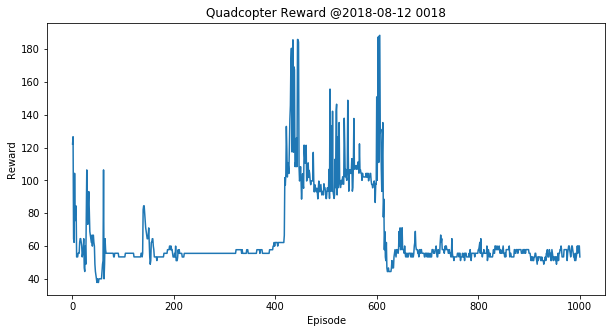

In [18]:
title = ''.join(str(datetime.now()).split(':')[:-1])
timestamp = re.sub(r'[- ]','',title)
memo = ''

# Print reward per episode
plt.figure(figsize=(10,5))
plt.plot(stats['Reward'])
plt.title("Quadcopter Reward @{}".format(title))
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.savefig('./charts/reward-{}-{}'.format(timestamp,memo))
plt.show()

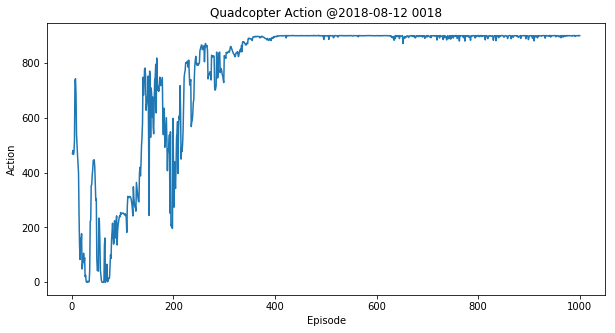

In [20]:
# Print action per episode# Print  
memo = ''

plt.figure(figsize=(10,5))
plt.plot(stats['Action_Val'])
plt.title("Quadcopter Action @{}".format(title))
plt.xlabel('Episode')
plt.ylabel('Action')
plt.savefig('./charts/action-{}-{}'.format(timestamp,memo))
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:The task I have chosen to train is the take off task.  The reward function is the following:

reward = tanh(1 - 0.0005*((abs(current position[x,y,z] - target position[x,y,z]).sum())

The drone receives a reward of 1 in each step of episode less a penalty based on the distance between its current location and the target location.  The distance is calculated based on the sum of difference between each x,y,z parameter between current and target position.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: The agent was implemented using actor/critic neural network based on the architectured outlined in Deep Deterministric Policy Gradients (DDPG) paper via this URL https://arxiv.org/abs/1509.02971 as well as the Keras' implementation here: https://github.com/yanpanlau/DDPG-Keras-Torcs.  Both Actor and Critic NN consists of two layers of 400 and 300, 12 regularizer of 0.1, batch normalization, relu activation at each layer and Adam optimizer with learning rate of 0.001. The final layer weights and biase were intialized from uniform distribution.  The discount rate (gamma) is set at 0.99 in order to generate a heavier weight on rewards earned now than the future.  Regularizers and initializers were also used to prevent vanishing and exploding gradients.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: It looks like the drone initially was able to achieve high rewards then stumbled back to the state where it's trying to figure out again before finally "learned" the task.  This is probably due to the explore vs expolit nature of the learning algorithm, where the drone will spend some time to explore before dedicated more episodes to exploit. The final performance of the agent wa actually not that great.  Based on the learning experience, the agent was able to achieve the highest reward around 440 episodes.  However, the rewards level fell down graduately and with the mean of last 10 episdoes between 55 ~ 60.  

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:  This by far is the most challenging project.  There were a lot of digging and researching around in the beiginning.  Unlike other projects where most of the code and direction were giving, this project left the design completely to the students.  To be honest, I wish more direction would be provided. Also, it would be more fun if the project can be linked to 3D simulator as visual response would definitely be more enjoyable. 

I do find it interesting on how agent was able to achieve high reward towards half way of the training but didn't stick to the high reward toward the last portion of the training.  If time permits, I would like to perform more testing and tuning and see if the agent can stick with high rewards.